# Escuela de Verano Delphos 2021
*Por Gonzalo Nelis S.*

Luego de semanas de arduo trabajo, por fin tenemos la lista oficial de asistentes a la Escuela de Verano Delphos 2021. En esta oportunidad, la pandemia obligó a cambiar de metodología y realizar la Escuela de forma remota. Gracias a esto, pudimos expandir la lista de interesados y hoy contamos con **107 inscritos**, cifra totalmente récord y practicamente el doble de la edición pasada. ¿De donde vienen nuestros inscritos? ¿Donde fuimos mas populares? ¿Qué instituciones nos apoyan? Acá intentamos responder todas esas preguntas.

## Instituciones y Nacionalidad

Los estudiantes de la Escuela vienen de 38 instituciones, concentradas principalmente en Sudamerica, con un par de invitados especiales de Norteamérica y Asia del Sur. Para tener una idea de la cantidad de alumnos por institución, se muestra la siguiente nube de palabras:

In [203]:
import folium
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import requests
import urllib.parse
from wordcloud import WordCloud
from folium.plugins import MarkerCluster

def get_coord(address):
    '''Esta funcion busca las coordenadas de una dirección en openstreetmap.
    Los casos especiales se modificaron para que encontrara la direccion correcta
    '''
    if address=="Universidad Católica del Norte": address+=" Antofagasta"
    if address=="Universidad San Sebastián": address+=" Santiago"
    if address=="Universidad Nacional Andrés Bello": address="Universidad Andrés Bello"
    if address=="Instituto Profesional Inacap": address="Inacap Santiago"
    if address=="Universidad Técnica Federico Santa María": address+=" Santiago"
    if address=="Universidad Adolfo Ibáñez": address+=" Peñalolen"

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

    response = requests.get(url).json()
    return [response[0]["lat"],response[0]["lon"]]

data = pd.read_csv("Raw_data.csv", sep = ";", header=0)

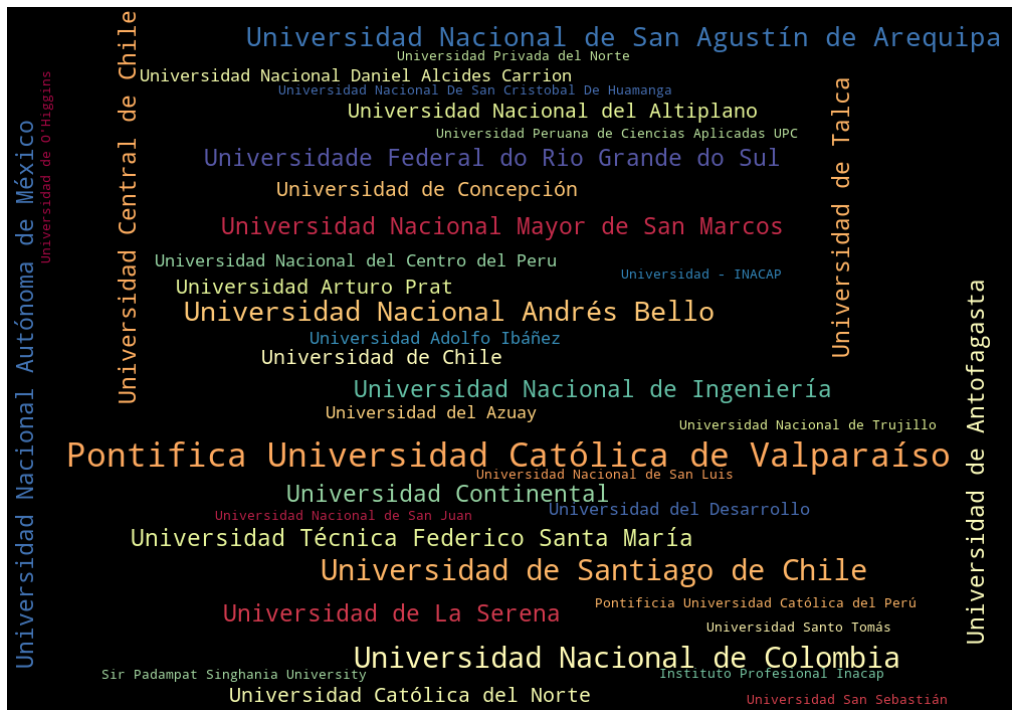

In [185]:


#Filtrado por pago
univ = data.loc[(data["Pagado"]!="No") & (data["Pagado"]!="No Inscrito")].value_counts("Universidad")

#Alumnos Por Universidad
univ = univ.to_frame(name = "Pop")
univ.reset_index(level=0, inplace=True)

## WordCloud Universidades
univ_freq_dict = dict(zip(univ["Universidad"].tolist(), univ["Pop"].tolist()))
wc_univ = WordCloud(width=1000, height=700, background_color = 'black', colormap = 'Spectral').generate_from_frequencies(univ_freq_dict)
plt.figure(figsize=(18, 18))
plt.imshow(wc_univ, interpolation='bilinear')
plt.axis('off')
plt.show()



Entre tanto nombre es fácil perderse. **¿Donde quedan estas Universidades?** El siguiente mapa despliega la locación de cada institución. Ojo con el punto de más a la derecha representando a nuestro estudiante de la **India**!. Al clickear en cada institución, se despliega el nombre y la cantidad de alumnos inscritos.

In [184]:

#Buscar coordenadas de cada Universidad
univ["Loc"] = univ["Universidad"].apply(get_coord)

# Crear mapa en folium
m = folium.Map(
    location = [0, -30],
    zoom_start=2,
    tiles='OpenStreetMap'
)

# Añadir marcadores agrupados
marker_cluster = folium.plugins.MarkerCluster().add_to(m)

# Añadir marcador e informacion de universidad y alumnos
for index,row in univ.iterrows():
    folium.Marker(location=row["Loc"],popup=f"{row['Universidad']}\n Estudiantes: {row['Pop'] }").add_to(marker_cluster)
m

Ciertamente hay gente de muchas partes distintas. Pero el lugar de la institución no necesariamente se condice con la nacionalidad de sus estudiantes **¿Cual es la distribución de nacionalidades en la escuela, entonces?**. Acá no hay muchas sorpresas: mitad Chile, mitad resto del mundo. La cantidad de peruanos, eso sí, creció sustancialmente con respecto al año anterior, siendo màs de un cuarto de los estudiantes totales. De Brasil llegaron menos que el año pasado, así que a nos toca aprender portugués para atraer a estudiantes de esas latitudes.


In [220]:
nac = data.loc[(data["Pagado"]!="No") & (data["Pagado"]!="No Inscrito")].value_counts("Nacionalidad")
#Alumnos Por Nacionalidad
nac = nac.to_frame(name = "Pop")
nac.reset_index(level=0, inplace=True)
fig1 = px.pie(nac, values='Pop', names='Nacionalidad', title = "Nacionalidades",width=600, height=600)
fig1

## Género

Una de las metas de la Escuela de Verano es ser paritaria. Se ha hecho dificil, pues la demografía de las carreras asociadas a la minería sigue siendo predominantemente masculina. ¿Como nos fue este año?. Un 32% de los estudiantes aceptados se identifica como Mujer. Aún estamos lejos del 50%, pero ciertamente hemos ido avanzando a lo largo de las distintas ediciones. Destacamos además a las Instituciones que tienen mayor numero de representantes femeninos. Destacar, además, el apoyo de [RIM Chile](https://www.redingenierasdeminas.com/
) que colaboró con la inclusión femenina al igual que el año pasado.


In [214]:
import plotly.graph_objects as go
import ipywidgets as ipw

gender_global = data.loc[(data["Pagado"]!="No") & (data["Pagado"]!="No Inscrito")].value_counts("Genero").to_frame(name = "Pop").reset_index(level=0)
fig1 = px.pie(gender_global, values='Pop', names='Genero',color_discrete_sequence = ['#EF553B','#636EFA'], title = "Genero global",width=400, height=400)
fig1.update_layout(showlegend=False)
fw1 = go.FigureWidget(fig1)

gender = data.loc[(data["Pagado"]!="No") & (data["Pagado"]!="No Inscrito")].pivot_table('Pagado',index ='Universidad', columns="Genero", aggfunc='count').fillna(0).reset_index(level=0)
gender["Universidad"]=gender["Universidad"].str.replace("Universidad","",regex=True)
top_gender = gender[gender["Mujer"]>1].sort_values(by="Mujer", ascending = True)
fig2 = px.bar(top_gender, y="Universidad", x=["Mujer","Hombre"], orientation='h', width=700, height=400)
fig2.update_layout(
    title="Género por Universidad",
    xaxis_title="Alumnos",
    legend_title_text='Género')
fw2 = go.FigureWidget(fig2)

fig_subplots = ipw.HBox([fw1, fw2])
fig_subplots

    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hover…

## Becas y auspiciadores

Esta edición tuvo otra particularidad: todos los estudiantes tuvieron beca. En la practica, ningun alumno pagó más de CLP 50,000, que es una reducción de un 75% con respecto al precio nominal del año pasado. Esto no solo fue por esfuerzo nuestro, sino que diversas Instituciones becaron directamente a sus estudiantes y además empresas auspiciadoras ([ProMine](https://promine.com/?lang=es) y [Nube Minera](https://nubeminera.cl/)) permitieron rebajar el costo de admisión. La siguiente Nube muestra a todas las instituciones que nos brindaron su apoyo según la cantidad de Estudiantes becados. A todas estas instituciones, nuestro agradecimiento.


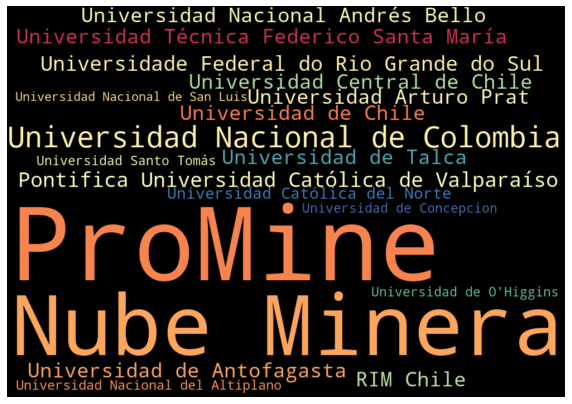

In [210]:
#Filtrado por pago
ausp = data.loc[(data["Pagado"]!="No") & (data["Pagado"]!="No Inscrito")].value_counts("Auspicio")

#Alumnos Por Universidad
ausp = ausp.to_frame(name = "Pop")
ausp.reset_index(level=0, inplace=True)

## WordCloud Universidades
ausp_freq_dict = dict(zip(ausp["Auspicio"].tolist(), univ["Pop"].tolist()))
wc_univ = WordCloud(width=1000, height=700, background_color = 'black', colormap = 'Spectral', relative_scaling = 0.1).generate_from_frequencies(ausp_freq_dict)
plt.figure(figsize=(10, 10))
plt.imshow(wc_univ, interpolation='bilinear')
plt.axis('off')
plt.show()

## ¿Dejamos todo para ultima hora?

Por ultimo, un dato anecdotico. Las inscripciones duraron 1 mes, y despues de las primeras 3 semanas estabamos un poco tristes porque no teniamos la convocatoria deseada. El Dr. Jelvez, organizador absoluto de las versiones anteriores, llamaba a la calma: él sabía que todos se inscriben a ultima hora. Dicho y hecho. Acá les mostramos las inscripciones por día hasta la fecha limite (que originalmente era el 18 de Diciembre, pero dejamos algunos cupos para estudiantes rezagados). Ciertamente lo de dejar todo para el final no sucede solo en Chile, si no en todo Latam.

In [212]:
df = pd.read_csv("inscripciones.csv", sep = ';', header = 0)
df["day"] = df.Date.str.split(' ').str[0]
df["day"] = pd.to_datetime(df.day, format='%d/%m/%Y')

df.country = df.country.str.replace('Pe\w+','Peru', regex = True, case = False)
df.country = df.country.str.replace('Co\w+','Colombia', regex = True, case = False)
df.country = df.country.str.replace('Ch\w+','Chile', regex = True, case = False)
df.country = df.country.str.replace('Br\w+','Brasil', regex = True, case = False)
df.country = df.country.str.replace('Me\w+','Mexico', regex = True, case = False)
df.country = df.country.str.replace('Ecu\w+','Ecuador', regex = True, case = False)
df.country = df.country.str.replace('Ven\w+','Venezuela', regex = True, case = False)
df.country = df.country.str.replace('Esp\w+','Español', regex = True, case = False)

In [216]:
fig = px.histogram(df, x="day", color="country", opacity = 0.75,color_discrete_sequence=px.colors.qualitative.G10, nbins = 50)
fig.update_layout(
    title_text='Inscripciones por dia', 
    xaxis_title_text='Día', 
    yaxis_title_text='Inscripciones',
    legend_title_text='Nacionalidad',
    bargap=0.2)
fig.show()

## Información de contacto
El codigo fuente y la data (sin información sensible) puede ser encontrada en [Github/gnelis](https://github.com/gnelis/EDV_Stats). Si encuentras un error (como la ubicación de alguna Universidad, por ejemplo) puedes contactarme por ese mismo medio (o enviando un correo :))